<h1><b>Assignment #4 - K Means Clustering</b></h1>
<hr >
Ryan Harris
<p><i>November 2020</i>

<h2><b>Prepare Data for Analysis</b></h2>
<hr>

<h4><b><u>Load Dependencies</u></b></h4>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator  

<h4><b><u>Import, Transform and Normalize Data</u></b></h4>

<i>In looking at the data structure, I want to make two quality of life changes. First, I will rename the columns, making them easier to call. Second, I will modify Public(1)/Private(2) to Binary so I can utilize sum/count when looking at categorical variables. I am also holding out Tufts University into its own data frame for future use.</i>

In [2]:
#Import
uni_df = pd.read_csv('Universities.csv')

#Fix Column Names and Modify Public(1)/Private(2) to Binary
uni_df.columns = ['cllg_nme','st','pblc_prvt','apps_rcd','apps_accptd','nw_stdnt_enrlld','pct_stdnt_top_10','pct_stdt_top_25','ft_ugrd','pt_ugrd','inst_ttn','oost_ttn','room','board','addl_fees','est_bk_cst','est_prsnl','pct_fac_w_phd','stdnt_fac_ration','grad_rt']
uni_df['pblc_prvt'] = uni_df['pblc_prvt'] -1

#df for Tufts
tufts_df = uni_df.loc[uni_df['cllg_nme'] == 'Tufts University']

#Remove Rows With Missing Data
uni_df = uni_df.dropna()

#Create a Copy of DataFram for Normalization
uni_df_norm = uni_df.copy()

#Assign Continuous Columns to Normalize
cols_to_norm = ['apps_rcd','apps_accptd','nw_stdnt_enrlld','pct_stdnt_top_10','pct_stdt_top_25','ft_ugrd','pt_ugrd','inst_ttn','oost_ttn','room','board','addl_fees','est_bk_cst','est_prsnl','pct_fac_w_phd','stdnt_fac_ration','grad_rt']

#Normalize only Coninuous Variables
scaler = preprocessing.StandardScaler()
uni_df_norm[cols_to_norm] = scaler.fit_transform(uni_df[cols_to_norm])

#Verify mean ~0, std ~1
uni_df_norm[cols_to_norm].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
apps_rcd,471.0,3.535742e-19,1.001063,-0.754595,-0.576410,-0.368978,0.175652,11.046639
apps_accptd,471.0,7.307200e-18,1.001063,-0.800432,-0.570733,-0.334236,0.157149,9.702574
nw_stdnt_enrlld,471.0,3.241097e-17,1.001063,-0.824027,-0.564914,-0.369213,0.126599,6.134837
pct_stdnt_top_10,471.0,-1.249296e-17,1.001063,-1.463346,-0.704932,-0.271552,0.432689,3.683036
pct_stdt_top_25,471.0,-5.150398e-17,1.001063,-2.297808,-0.770921,-0.081359,0.657458,2.184345
ft_ugrd,471.0,-1.980016e-17,1.001063,-0.710495,-0.545625,-0.396191,0.105603,6.020252
pt_ugrd,471.0,1.308225e-17,1.001063,-0.515787,-0.463655,-0.322801,0.046333,13.624637
inst_ttn,471.0,6.882911e-17,1.001063,-1.596578,-1.044493,0.081904,0.696681,1.940390
oost_ttn,471.0,2.281732e-16,1.001063,-2.212899,-0.762733,-0.110321,0.629389,2.211431
room,471.0,-7.920062e-17,1.001063,-2.219315,-0.675305,-0.184030,0.620259,3.642308


<h2><b>k Means</b></h2>
<hr>

<h4><b><u>Find Optimal k Using Elbow Method</u></b></h4>

'The optimal k is 3'

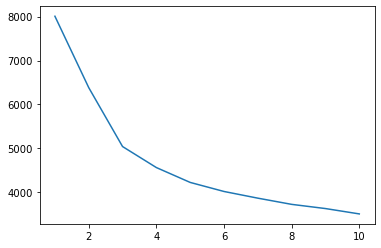

In [3]:
#Get SSE
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 6011,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(uni_df_norm.iloc[:,3:20])
    sse.append(kmeans.inertia_)

#Plot for Visual
plt.plot(range(1,11),sse)

#Use KneeLocator to confirm
kl = KneeLocator(
        range(1,11), sse, curve ="convex", direction="decreasing")
str("The optimal k is ") + str(kl.elbow)

<h4><b><u>Run k Means using Optimal k to Generate Clusters</u></b></h4>

In [4]:
#Set parameters for kmeans using kl.elbow value from above
kmeans = KMeans(
    init="random",
    n_clusters=kl.elbow,
    n_init=10,
    max_iter=300,
    random_state=6011
)
kmeans.fit(uni_df_norm.iloc[:,3:20])

#Assign clusters to original dataframe and verify
uni_df['cluster'] = kmeans.labels_
uni_df[['cllg_nme','cluster']].head()

,cllg_nme,cluster
0,Alaska Pacific University,1
2,University of Alaska Southeast,1
9,Birmingham-Southern College,2
11,Huntingdon College,1
21,Talladega College,1


<h2><b>Describe and Analyze Clusters</b></h2>
<hr>

<i>Before starting to analyze, I am going to create a few new variables using the mean of the columns listed:
    <ul>
        <li>'accpt_rt': apps_accptd/apps_rcd</li>
        <li>'ft_urgd_rt': ft_ugrd/(ft_ugrd+pt_ugrd)</li>
        <li>'oost_ttn_diff': (oost_ttn-inst_ttn)/inst_ttn</li></ul>
I will also pull the mean, std, min, and max for all other variables.<hr>

In [5]:
#Create columns listed above
uni_df['accpt_rt'] = (uni_df['apps_accptd']/uni_df['apps_rcd'])*100
uni_df['ft_urgd_rt'] = (uni_df['ft_ugrd']/(uni_df['ft_ugrd']+uni_df['pt_ugrd']))*100
uni_df['oost_ttn_diff'] = ((uni_df['oost_ttn']-uni_df['inst_ttn'])/uni_df['inst_ttn'])*100

<h4><b><u>Separate into DataFrame by Cluster</u></b></h4>

In [6]:
uni_df1 = uni_df[uni_df['cluster'] == 0]
uni_df2 = uni_df[uni_df['cluster'] == 1]
uni_df3 = uni_df[uni_df['cluster'] == 2]

#Set [incl_col] to Re-order Columns and Take Out Categorical 'pblc_prvt'
incl_col = ['apps_rcd','apps_accptd','accpt_rt','nw_stdnt_enrlld','pct_stdnt_top_10','pct_stdt_top_25','ft_ugrd','pt_ugrd','ft_urgd_rt','inst_ttn','oost_ttn','oost_ttn_diff',
            'room','board','addl_fees','est_bk_cst','est_prsnl','pct_fac_w_phd','stdnt_fac_ration','grad_rt']

<h4><b><u>Describe Cluster 0</u></b></h4>

In [7]:
#Mean, Standard Deviation, Minimum and Maximum for Included Columns
uni_df1[incl_col].describe().loc[['mean','std','min','max']].transpose()

,mean,std,min,max
apps_rcd,11102.617021,6861.966582,4418.000000,48094.000000
apps_accptd,7579.617021,3974.906269,2737.000000,26330.000000
accpt_rt,71.124398,13.797652,33.970598,95.634857
nw_stdnt_enrlld,2996.574468,1152.967961,1567.000000,6392.000000
pct_stdnt_top_10,30.255319,15.169288,12.000000,75.000000
pct_stdt_top_25,60.638298,17.032482,29.000000,95.000000
ft_ugrd,15197.425532,5610.451341,8516.000000,31643.000000
pt_ugrd,3452.978723,3441.945781,114.000000,21836.000000
ft_urgd_rt,82.757636,11.247451,43.043456,98.999298
inst_ttn,3583.936170,3641.517304,672.000000,18420.000000


<hr><u>Continuous Measures Anaylsis for Cluster 0</u>
<br><i>Universities with low in-state tuition, low acceptance rate, very high new student count with high full time undergrad rate, lower graduation rate, and a very large difference in in-state and out-of-state tuition.</i><hr>

<h4><b><u>Describe Cluster 1</u></b></h4>

In [8]:
#Mean, Standard Deviation, Minimum and Maximum for Included Columns
uni_df2[incl_col].describe().loc[['mean','std','min','max']].transpose()

,mean,std,min,max
apps_rcd,1668.087591,1676.646968,77.000000,8598.000000
apps_accptd,1176.525547,1014.391126,61.000000,5027.000000
accpt_rt,77.351227,13.918475,32.833333,100.000000
nw_stdnt_enrlld,485.000000,413.226002,27.000000,2054.000000
pct_stdnt_top_10,18.729927,10.125588,1.000000,56.000000
pct_stdt_top_25,45.204380,15.506179,9.000000,93.000000
ft_ugrd,2161.408759,2124.418240,249.000000,11493.000000
pt_ugrd,606.835766,765.250558,6.000000,5346.000000
ft_urgd_rt,79.214284,15.398830,11.431412,99.375000
inst_ttn,7197.901460,3871.480542,608.000000,15476.000000


<hr><u>Continuous Measures Anaylsis for Cluster 1</u>
<br><i>Universities with median tuition, high acceptance rate, low full-time undergrad rate, low percentage of faculty with PHD, lower graduation rate.</i><hr>

<h4><b><u>Describe Cluster 2</u></b></h4>

In [9]:
#Mean, Standard Deviation, Minimum and Maximum for Included Columns
uni_df3[incl_col].describe().loc[['mean','std','min','max']].transpose()

,mean,std,min,max
apps_rcd,3356.673333,2934.965286,212.000000,13865.000000
apps_accptd,1953.613333,1397.862476,189.000000,7260.000000
accpt_rt,67.688233,18.307567,15.448631,96.047431
nw_stdnt_enrlld,626.553333,433.325684,91.000000,2464.000000
pct_stdnt_top_10,44.266667,19.805316,11.000000,96.000000
pct_stdt_top_25,73.173333,15.977227,26.000000,100.000000
ft_ugrd,2477.593333,1813.180787,309.000000,10142.000000
pt_ugrd,313.586667,529.123984,1.000000,4379.000000
ft_urgd_rt,90.446956,11.458696,32.594937,99.930844
inst_ttn,15265.700000,3197.274015,2808.000000,20100.000000


<hr><u>Continuous Measures Anaylsis for Cluster 2</u>
<br><i>Universities with high tuition, low acceptance rate, high full-time undergrad rate, high graduation rate, and similar in-state and out-of-state tuition.</i><hr>

<h4><b><u>Categorical Measures Analysis</u></b></h4>

<i>I am starting by looking at the proportional distribution of colleges by states within the cluster. Because colleges are unevenly distributed by state in the source data, it is important to compare the proportions of the cluster to the proportions of the source data.</i>

In [10]:
#Get Counts and % of Counts by State for Each Cluster
uni_df1_st = uni_df1.groupby(['st'])['cllg_nme'].count().reset_index(name='ct')
uni_df1_st['pct'] = (uni_df1_st['ct']/uni_df1['cllg_nme'].count())*100
uni_df2_st = uni_df2.groupby(['st'])['cllg_nme'].count().reset_index(name='ct')
uni_df2_st['pct'] = (uni_df2_st['ct']/uni_df2['cllg_nme'].count())*100
uni_df3_st = uni_df3.groupby(['st'])['cllg_nme'].count().reset_index(name='ct')
uni_df3_st['pct'] = (uni_df3_st['ct']/uni_df3['cllg_nme'].count())*100

#Get Counts and % of Counts by State for Original DataFram
uni_df_st = uni_df.groupby(['st'])['cllg_nme'].count().reset_index(name='ct')
uni_df_st['pct_ovrl'] = (uni_df_st['ct']/uni_df['cllg_nme'].count())*100

#Add Original DataFrame %
uni_df1_st['pct_ovrl'] = uni_df1_st['st'].map(uni_df_st.set_index('st')['pct_ovrl'])
uni_df2_st['pct_ovrl'] = uni_df2_st['st'].map(uni_df_st.set_index('st')['pct_ovrl'])
uni_df3_st['pct_ovrl'] = uni_df3_st['st'].map(uni_df_st.set_index('st')['pct_ovrl'])

#Create 'pct_diff' Column by subtracting 'pct_ttl' from 'pct'
uni_df1_st['pct_diff'] = ((uni_df1_st['pct'] - uni_df1_st['pct_ovrl'])/uni_df1_st['pct_ovrl'])*100
uni_df2_st['pct_diff'] = ((uni_df2_st['pct'] - uni_df2_st['pct_ovrl'])/uni_df2_st['pct_ovrl'])*100
uni_df3_st['pct_diff'] = ((uni_df3_st['pct'] - uni_df3_st['pct_ovrl'])/uni_df3_st['pct_ovrl'])*100

<i>I will also pull in the percentage of Private vs. Public for each cluster below:</i>

In [11]:
#Create uni_df1_p df with Private(.sum()), Public(.count()-.sum()), and %Private (.sum()/count.())
uni_p_data = np.array([['','Public','Private','%Private'],
                     ['Cluster 0',uni_df1['pblc_prvt'].count()-uni_df1['pblc_prvt'].sum(),uni_df1['pblc_prvt'].sum(),(uni_df1['pblc_prvt'].sum()/uni_df1['pblc_prvt'].count())*100],
                     ['Cluster 1',uni_df2['pblc_prvt'].count()-uni_df2['pblc_prvt'].sum(),uni_df2['pblc_prvt'].sum(),(uni_df2['pblc_prvt'].sum()/uni_df2['pblc_prvt'].count())*100],
                     ['Cluster 2',uni_df3['pblc_prvt'].count()-uni_df3['pblc_prvt'].sum(),uni_df3['pblc_prvt'].sum(),(uni_df3['pblc_prvt'].sum()/uni_df3['pblc_prvt'].count())*100]])
uni_df_p = pd.DataFrame(data=uni_p_data[1:,1:],
                        index=uni_p_data[1:,0],
                        columns=uni_p_data[0,1:])
#Verify table
print(uni_df_p)

          Public Private            %Private
Cluster 0     42       5  10.638297872340425
Cluster 1     83     191    69.7080291970803
Cluster 2      3     147                98.0


In [12]:
#Cluster 0 - Sort by 'ct' and Print Top 10 for Analysis
uni_df1_st = uni_df1_st.sort_values(by='ct', ascending=False)
print("Cluster 0 Counts and Percentages")
print(uni_df1_st.head(10))
print("Cluster 0 Public vs. Private")
print(uni_df_p.iloc[:1,:])

Cluster 0 Counts and Percentages
    st  ct       pct  pct_ovrl    pct_diff
13  NC   4  8.510638  4.883227   74.283071
23  TX   4  8.510638  4.246285  100.425532
18  OH   4  8.510638  5.095541   67.021277
25  VA   3  6.382979  3.184713  100.425532
20  PA   3  6.382979  8.917197  -28.419453
8   MA   3  6.382979  4.670913   36.653772
10  MI   2  4.255319  2.760085   54.173486
17  NY   2  4.255319  8.067941  -47.256439
1   CA   2  4.255319  3.184713   33.617021
0   AZ   2  4.255319  0.424628  902.127660
Cluster 0 Public vs. Private
          Public Private            %Private
Cluster 0     42       5  10.638297872340425


<hr><u>Categorical Measures Analysis for Cluster 0</u>
<br><i>Both more rural and more heavily Public. We see a larger percentage of schools in NC, TX, and OH than we see in the normal distribution. In additon, we see a far lower concertration of schools in the "hubs" of PA and NY with -28% and -47% less than the source data.</i><hr>

In [13]:
#Cluster 1 - Sort by 'ct' and Print Top 10 for Analysis
uni_df2_st = uni_df2_st.sort_values(by='ct', ascending=False)
print("Cluster 1 Counts and Percentages")
print(uni_df2_st.head(10))
print("Cluster 1 Public vs. Private")
print(uni_df_p.iloc[1:2,:])

Cluster 1 Counts and Percentages
    st  ct       pct  pct_ovrl   pct_diff
35  PA  19  6.934307  8.917197 -22.236705
31  NY  18  6.569343  8.067941 -18.574721
25  NC  16  5.839416  4.883227  19.581085
10  IA  16  5.839416  3.821656  52.798054
40  TX  14  5.109489  4.246285  20.328467
32  OH  13  4.744526  5.095541  -6.888686
22  MO  12  4.379562  3.184713  37.518248
39  TN  11  4.014599  3.184713  26.058394
29  NJ   9  3.284672  2.760085  19.006176
42  VA   8  2.919708  3.184713  -8.321168
Cluster 1 Public vs. Private
          Public Private          %Private
Cluster 1     83     191  69.7080291970803


<hr><u>Categorical Measures Analysis for Cluster 1</u>
<br><i>Distribution tends to be locater more Central-East and leans slightly more Private than Public </i><hr>

In [14]:
#Cluster - 2 Sort by 'ct' and Print Top 10 for Analysis
uni_df3_st = uni_df3_st.sort_values(by='ct', ascending=False)
print("Cluster 2 Counts and Percentages")
print(uni_df3_st.head(10))
print("Cluster 2 Public vs. Private")
print(uni_df_p.iloc[2:,:])

Cluster 2 Counts and Percentages
    st  ct        pct  pct_ovrl    pct_diff
25  PA  20  13.333333  8.917197   49.523810
22  NY  18  12.000000  8.067941   48.736842
12  MA  12   8.000000  4.670913   71.272727
1   CA  10   6.666667  3.184713  109.333333
23  OH   7   4.666667  5.095541   -8.416667
9   IN   7   4.666667  3.184713   46.533333
3   CT   6   4.000000  2.123142   88.400000
8   IL   6   4.000000  3.184713   25.600000
24  OR   4   2.666667  1.061571  151.200000
16  MN   4   2.666667  2.335456   14.181818
Cluster 2 Public vs. Private
          Public Private %Private
Cluster 2      3     147     98.0


<hr><u>Categorical Measures Analysis for Cluster 2</u>
<br><i>A higher concentration in the Northeast, with 1/3rd of schools in PA, NY or MA. This cluster is also very heavily private (147 of 150 schools) </i><hr>